# Code for Machine Learning With tidymodels

Author: Shinin Varongchayakul

Date: 20 Mar 2025

Language: R

## Step 0. Prepare the Packages & Dataset

### Install and Load the Library

In [ ]:
# Install
install.packages("tidymodels")
install.packages("MASS")
install.packages("dplyr")

In [1]:
# Load
library(tidymodels)
library(MASS)
library(dplyr)

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ recipes      1.2.0
✔ dials        1.4.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




### Load the Datasete

In [2]:
# Load the dataset
data(Boston)

# Preview
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
# View the structure
glimpse(Boston)

Rows: 506
Columns: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ black   <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396.90…
$ lstat   <dbl> 4.

### Prepare the Data for Classification Task

In [4]:
# Create a copy of Boston
bt <- Boston

In [5]:
# Convert `chas` to factor
bt$chas <- factor(bt$chas,
                  levels = c(1, 0),
                  labels = c("tract bounds river", "otherwise"))

In [6]:
# Create a new categorical outcome
bt <- bt |>
        mutate(medv_class = if_else(medv > quantile(medv, 0.5),
                                    "high",
                                    "low"))

In [7]:
# Convert `medv_class` to factor
bt$medv_class <- factor(bt$medv_class,
                        levels = c("high", "low"))

In [8]:
# Drop `medv`
bt$medv <- NULL

In [9]:
# Check the results
glimpse(bt)

Rows: 506
Columns: 14
$ crim       <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.088…
$ zn         <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5…
$ indus      <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87,…
$ chas       <fct> otherwise, otherwise, otherwise, otherwise, otherwise, othe…
$ nox        <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.5…
$ rm         <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.6…
$ age        <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9…
$ dis        <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9…
$ rad        <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,…
$ tax        <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311,…
$ ptratio    <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2,…
$ black      <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396…
$ lstat      <dbl>

## Step 1. Split the Data

In [10]:
# Create training index

## Set seed for reproducibility
set.seed(300)

## Create index
bt_split <- initial_split(bt,
                          prop = 0.8,
                          strata = medv_class)

In [11]:
# Create training and test sets

## Training set
bt_train <- training(bt_split)

## Test set
bt_test <- testing(bt_split)

## Step 2. Prepare the Recipe

In [12]:
# Create a recipe
bt_recipe <- recipe(medv_class ~ .,
                    bt_train) |>
                
                ## Remove near-zero variance predictors
                step_nzv(all_numeric_predictors()) |>

                ## Handle multicollinearity
                step_corr(all_numeric_predictors(),
                          threshold = 0.8) |>

                ## Dummy-code nominal predictors
                step_dummy(all_nominal_predictors()) |>

                ## Normalsie the data
                step_normalize(all_numeric_predictors())

## Step 3. Prepare & Bake

In [13]:
# Prepare the recipe
bt_recipe_prep <- prep(bt_recipe,
                       data = bt_train)

In [14]:
# Bake the training and test sets

## Training set
bt_train_prep <- bake(bt_recipe_prep,
                      new_data = NULL)

## Test set
bt_test_prep <- bake(bt_recipe_prep,
                     new_data = bt_test)

## Step 4. Instantiate the Model

In [15]:
# Instantiate decision tree
dt_model <- decision_tree() |>

    ## Set engine
    set_engine("rpart") |>

    ## Set mode
    set_mode("classification")

## Step 5. Train the Model

In [16]:
# Train the model
dt_model_fit <- fit(dt_model,
                    medv_class ~ .,
                    data = bt_train_prep)

## Step 6. Make Predictions

In [17]:
# Predict the outcome
y_pred <- predict(dt_model_fit,
                  new_data = bt_test_prep,
                  type = "class")

# View the result
head(y_pred)

.pred_class
<fct>
high
high
low
low
low
low


In [18]:
# Get predicted probabilities
y_prob <- predict(dt_model_fit,
                  new_data = bt_test_prep,
                  type = "prob")

# View the results
head(y_prob)

.pred_high,.pred_low
<dbl>,<dbl>
0.98591549,0.01408451
0.98591549,0.01408451
0.07462687,0.92537313
0.27536232,0.72463768
0.27536232,0.72463768
0.12500000,0.87500000


In [19]:
# Store the results in a tibble
dt_results <- tibble(actual = bt_test_prep$medv_class,
                     predicted = y_pred$.pred_class,
                     prob_high = y_prob$.pred_high,
                     prob_low = y_prob$.pred_low)

# View the tibble
head(dt_results)

actual,predicted,prob_high,prob_low
<fct>,<fct>,<dbl>,<dbl>
high,high,0.98591549,0.01408451
high,high,0.98591549,0.01408451
low,low,0.07462687,0.92537313
low,low,0.27536232,0.72463768
low,low,0.27536232,0.72463768
low,low,0.12500000,0.87500000


## Step 7. Evaluate the Model

In [20]:
# Create a confusion matrix
dt_cm <- conf_mat(dt_results,
                  truth = actual,
                  estimate = predicted)

# View the matrix
print(dt_cm)

          Truth
Prediction high low
      high   44  10
      low     6  42


In [21]:
# Get all evaluation metrics
summary(dt_cm)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8431373
kap,binary,0.6866359
sens,binary,0.8800000
spec,binary,0.8076923
ppv,binary,0.8148148
npv,binary,0.8750000
mcc,binary,0.6887527
j_index,binary,0.6876923
bal_accuracy,binary,0.8438462


In [22]:
# Create a set of custom metrics
dt_metrics <- metric_set(accuracy,
                         sens,
                         yardstick::spec)

In [23]:
# Apply the custom metric set
dt_metrics(dt_results,
           truth = actual,
           estimate = predicted)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8431373
sens,binary,0.8800000
spec,binary,0.8076923


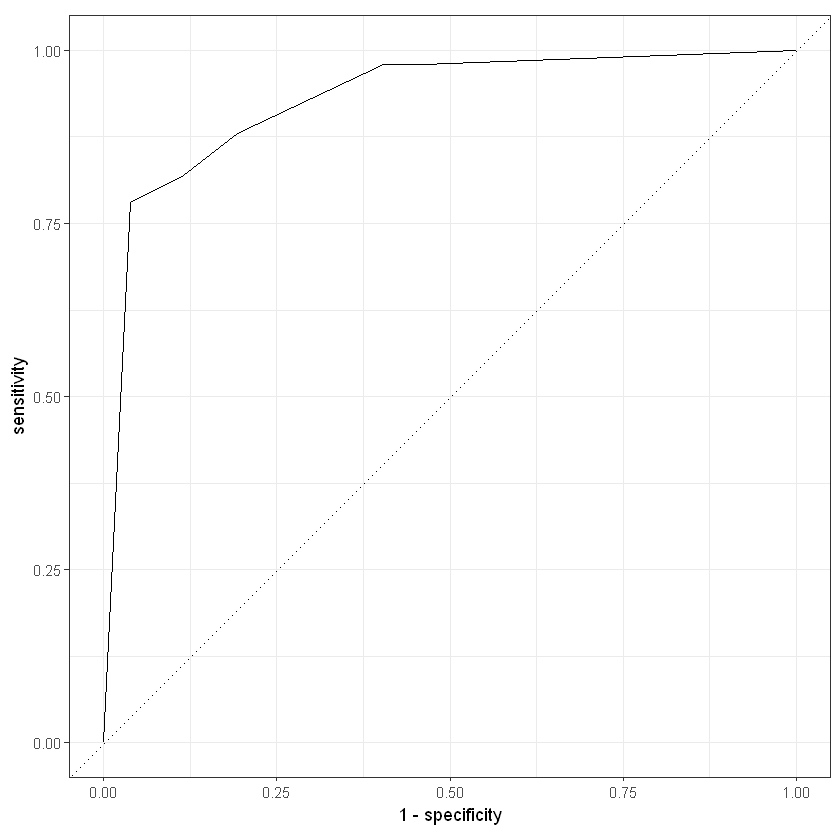

In [24]:
# Plot ROC curve
roc_curve(dt_results,
          actual,
          prob_high) |>
          autoplot()

In [25]:
# Compute ROC AUC
roc_auc(dt_results,
        actual,
        prob_high)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9282692


## Shortcut: Steps 3-6

In [ ]:
# Use workflow() and last_fit() to shorten the process

## Define training set index

### Set seed for reproducibility
set.seed(300)

### Create index
bt_split <- initial_split(bt,
                          prop = 0.8,
                          strata = medv_class)

In [29]:
## Create a recipe
bt_recipe <- recipe(medv_class ~ .,
                    bt_train) |>
                
                ### Remove near-zero variance predictors
                step_nzv(all_numeric_predictors()) |>

                ### Handle multicollinearity
                step_corr(all_numeric_predictors(),
                          threshold = 0.8) |>

                ### Dummy-code nominal predictors
                step_dummy(all_nominal_predictors()) |>

                ### Normalsie the data
                step_normalize(all_numeric_predictors())

In [30]:
## Instantiate decision tree
dt_model <- decision_tree() |>

    ### Set engine
    set_engine("rpart") |>

    ### Set mode
    set_mode("classification")

In [31]:
## Use workflow() to bundle recipe and model
bt_wfl <- workflow() |>
    
    ### Add recipe
    add_recipe(bt_recipe) |>

    ### Add model
    add_model(dt_model)

In [36]:
# Create a set of custom metrics
dt_metrics <- metric_set(accuracy,
                         sens,
                         yardstick::spec,
                         roc_auc)

In [37]:
## Use last_fit() to train the model
dt_last_fit <- last_fit(bt_wfl,
                        split = bt_split,
                        metrics = dt_metrics)

In [42]:
# Predict the outcome with collect_predictions()
dt_predictions <- collect_predictions(dt_last_fit)

# Preview the predictions
head(dt_predictions)

.pred_class,.pred_high,.pred_low,id,.row,medv_class,.config
<fct>,<dbl>,<dbl>,<chr>,<int>,<fct>,<chr>
high,0.98591549,0.01408451,train/test split,3,high,Preprocessor1_Model1
high,0.98591549,0.01408451,train/test split,6,high,Preprocessor1_Model1
low,0.07462687,0.92537313,train/test split,9,low,Preprocessor1_Model1
low,0.27536232,0.72463768,train/test split,27,low,Preprocessor1_Model1
low,0.27536232,0.72463768,train/test split,32,low,Preprocessor1_Model1
low,0.12500000,0.87500000,train/test split,36,low,Preprocessor1_Model1


In [40]:
## Evaluate the model
dt_last_fit_metrics <- collect_metrics(dt_last_fit)

## Print
print(dt_last_fit_metrics)

# A tibble: 4 × 4
  .metric  .estimator .estimate .config             
  <chr>    <chr>          <dbl> <chr>               
1 accuracy binary         0.843 Preprocessor1_Model1
2 sens     binary         0.88  Preprocessor1_Model1
3 spec     binary         0.808 Preprocessor1_Model1
4 roc_auc  binary         0.928 Preprocessor1_Model1


In [43]:
## Create confusion matrix
conf_mat(dt_predictions,
         truth = medv_class,
         estimate = .pred_class)

          Truth
Prediction high low
      high   44  10
      low     6  42

In [45]:
## Plot ROC curve
autoplot(dt_last_fit, type = "roc_curve")

ERROR: [1m[33mError[39m in `autoplot()`:[22m
[33m![39m There is no `autoplot()` implementation for `resample_results`.


## Step 8. Hyperparametre Tuning

In [67]:
# Create a tune model
dt_tune <- decision_tree(cost_complexity = tune(),
                         tree_depth = tune(),
                         min_n = tune()) |>
            
            ## Set engine
            set_engine("rpart") |>

            ## Set mode
            set_mode("classification")

In [ ]:
# Create grid random
dt_grid <- grid_random(cost_complexity(range = c(-5, 0), trans = log10_trans()),
                       tree_depth(range = c(1, 20)),
                       min_n(range = c(2, 50)),
                       size = 20)

In [90]:
# Create v-fold cross validation

## Set seed for reproducibility
set.seed(100)

# Create folds
dt_cv <- vfold_cv(bt_train,
                  v = 5,
                  strata = medv_class)

In [91]:
# Create a workflow
dt_wf <- workflow() |>

            ## Add recipe
            add_recipe(bt_recipe) |>

            ## Add model
            add_model(dt_tune)

In [95]:
# Tune the model
dt_tune_results <- tune_grid(dt_wf,
                             resamples = dt_cv,
                             grid = dt_grid,
                             metrics = metric_set(accuracy, roc_auc))

## Step 9. Select the Best Parametre Combination

In [97]:
# View the best parametre combination
dt_tune_results |> show_best(metric = "roc_auc",
                             n = 5)

cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6.271560e-04,6,39,roc_auc,binary,0.8812271,5,0.01989456,Preprocessor1_Model19
1.913885e-05,3,24,roc_auc,binary,0.8771707,5,0.02043237,Preprocessor1_Model04
5.775800e-03,12,30,roc_auc,binary,0.8769268,5,0.02047074,Preprocessor1_Model03
5.404966e-03,19,29,roc_auc,binary,0.8769268,5,0.02047074,Preprocessor1_Model09
2.201641e-03,19,32,roc_auc,binary,0.8738537,5,0.02324114,Preprocessor1_Model05


In [108]:
# Select the best combination
best_params <- select_best(dt_tune_results,
                           metric = "roc_auc")

In [112]:
# Add the combination to the model
dt_best_wf <- finalize_workflow(dt_wf, best_params)

## Step 10. Fit the Best Model

In [143]:
# Fit the model
dt_best_fit <- last_fit(dt_best_wf,
                        split = bt_split,
                        metrics = metric_set(accuracy, sens, yardstick::spec, roc_auc))

## Step 11. Make Predictions With the Best Model

In [144]:
# Make predictions
dt_best_predictions <- collect_predictions(dt_best_fit)

# Preview the results
head(dt_best_predictions)

.pred_class,.pred_high,.pred_low,id,.row,medv_class,.config
<fct>,<dbl>,<dbl>,<chr>,<int>,<fct>,<chr>
high,0.97959184,0.02040816,train/test split,3,high,Preprocessor1_Model1
high,0.97959184,0.02040816,train/test split,6,high,Preprocessor1_Model1
low,0.07633588,0.92366412,train/test split,13,high,Preprocessor1_Model1
high,0.54838710,0.45161290,train/test split,18,low,Preprocessor1_Model1
low,0.13333333,0.86666667,train/test split,19,low,Preprocessor1_Model1
low,0.07633588,0.92366412,train/test split,28,low,Preprocessor1_Model1


## Step 12. Evaluate the Best Model

In [145]:
# Collect metrics
collect_metrics(dt_best_fit)

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8235294,Preprocessor1_Model1
sens,binary,0.8600000,Preprocessor1_Model1
spec,binary,0.7884615,Preprocessor1_Model1
roc_auc,binary,0.9028846,Preprocessor1_Model1


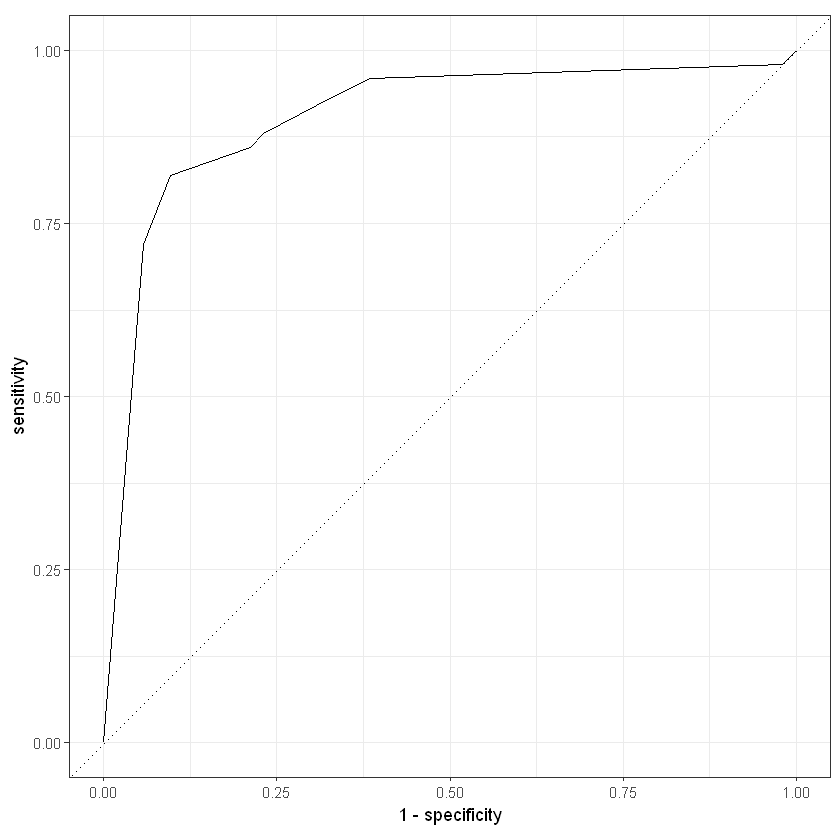

In [147]:
# Plot the ROC curve
roc_curve(dt_best_predictions,
          truth = medv_class,
          .pred_high) |>
    autoplot()